In [36]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('../scrapper/data/reseñas_amazon.csv')

In [4]:
df.isnull().sum() # 60 nulls

reseñas_humanas       60
nombre_producto        0
categoria_producto     0
dtype: int64

In [5]:
len(df)

2229

In [6]:
# 60 nulls de 2229 muestras.
df.dropna(inplace=True)

In [7]:
df.isnull().sum()

reseñas_humanas       0
nombre_producto       0
categoria_producto    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2169 entries, 0 to 2228
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   reseñas_humanas     2169 non-null   object
 1   nombre_producto     2169 non-null   object
 2   categoria_producto  2169 non-null   object
dtypes: object(3)
memory usage: 67.8+ KB


In [9]:
df['longitud'] = df['reseñas_humanas'].apply(lambda x: len(x))

In [10]:
df['longitud'].mean()

346.248040571692

In [11]:
# La longitud media de cada reseña es de 346 palabras, cada 1000 tokens OpenAI te cobra 0.002 dolares, hay aproximadamente 750 palabras en 1000 tokens

In [12]:
from language_detector import detect_language

df['idioma'] = df['reseñas_humanas'].apply(lambda x: detect_language(x))

In [13]:
df.head()

,reseñas_humanas,nombre_producto,categoria_producto,longitud,idioma
0,Necesitaba un nuevo movil y me decidí por este...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Los más vendidos en Amazon Renewed,297,es
1,Quisiera expresar mi profunda insatisfacción c...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Los más vendidos en Amazon Renewed,1830,es
2,Está en perfectas condiciones la batería al 10...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Los más vendidos en Amazon Renewed,99,es
3,Me llegó ayer el iPhone en perfectas condicion...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Los más vendidos en Amazon Renewed,436,es
4,El iPhone 12 es un auténtico logro de la ingen...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Los más vendidos en Amazon Renewed,1385,es


In [14]:
df['idioma'].value_counts()

idioma
es    1361
fr     209
it     189
en     187
de     115
nl      30
pt      24
sv      16
pl       9
so       4
ro       4
sw       3
af       3
fi       3
tl       2
ca       2
sk       1
no       1
vi       1
da       1
Name: count, dtype: int64

In [27]:
# Vamos asegurarnos que la funcion de la api funciona correctamente
from gpt_API import gpt_translator

df_prueba_2 = df.copy().head(2) # Con dos muestras nos vale


df_prueba_2['reseñas_humanas'][0] = '''
    Mon iPhone est tombé en panne après 9 mois, je l'ai renvoyé au vendeur ecommunity qui ne m' a toujours pas remboursé après 1 mois et demi et qui est injoignable... A fuir","        Apple iPhone 12 Mini, 64GB, Negro - (Reacondicionado)       ",Los más vendidos en Amazon Renewed
    Overall very pleased with the condition. The screen is flawless. 
'''
df_prueba_2['idioma'][0] = 'fr'

# Para ver si entra aun especificando que es 'es'
df_prueba_2['reseñas_humanas'][1] = '''
    Mon iPhone est tombé en panne après 9 mois, je l'ai renvoyé au vendeur ecommunity qui ne m' a toujours pas remboursé après 1 mois et demi et qui est injoignable... A fuir","        Apple iPhone 12 Mini, 64GB, Negro - (Reacondicionado)       ",Los más vendidos en Amazon Renewed
    Overall very pleased with the condition. The screen is flawless. 
'''

C:\Users\pabma\AppData\Local\Temp\ipykernel_3116\3489266393.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_prueba_2['reseñas_humanas'][0] = '''
C:\Users\pabma\AppData\Local\Temp\ipykernel_3116\3489266393.py:11: FutureWarning: Chained

In [28]:
df_prueba_2['reseñas_humanas'] = df_prueba_2.apply(lambda row: gpt_translator(row['reseñas_humanas'], row['idioma']), axis=1)

TRADUCIDO


In [29]:
# Parece que todo funciona perfectamente, hagamoslo ahora con todo el dataset
df_prueba_2

,reseñas_humanas,nombre_producto,categoria_producto,longitud,idioma
0,"Mi iPhone se averió después de 9 meses, lo env...","Apple iPhone 12, 128GB, Negro - (Reaco...",Los más vendidos en Amazon Renewed,297,fr
1,\n Mon iPhone est tombé en panne après 9 mo...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Los más vendidos en Amazon Renewed,1830,es


In [30]:
df_traducido = df.copy()
df_traducido['reseñas_humanas'] = df_traducido.apply(lambda x: gpt_translator(x['reseñas_humanas'], x['idioma']), axis=1)

TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO
TRADUCIDO


In [34]:
df_traducido.to_csv('data/df_traducido.csv', index=False) # Como nos cuesta dinero la API, viene bien ir haciendo copias.

In [31]:
df_traducido['idioma_original'] = df_traducido['idioma']
df_traducido['idioma'] = df['reseñas_humanas'].apply(lambda x: detect_language(x)) # Comprobamos si todos son en español

In [32]:
df_traducido[df_traducido['idioma'] == 'fr']

,reseñas_humanas,nombre_producto,categoria_producto,longitud,idioma,idioma_original
34,"iPhone reacondicionado como nuevo, el único in...","Apple iPhone 12 Pro, 128GB, Azul Pacif...",Los más vendidos en Amazon Renewed,347,fr,fr
38,Y sobre todo la calidad es propia.,"Apple iPhone 12 Pro, 128GB, Azul Pacif...",Los más vendidos en Amazon Renewed,30,fr,fr
53,"""Mejor de lo que imaginaba. Curioso por ver el...",HP Elite 8300 - Ordenador de sobremesa...,Los más vendidos en Amazon Renewed,191,fr,fr
66,"Mi iPhone se averió después de 9 meses, lo env...","Apple iPhone 12 Mini, 64GB, Negro - (R...",Los más vendidos en Amazon Renewed,170,fr,fr
68,El producto es perfectamente conforme a lo esp...,"Apple iPhone 12 Mini, 64GB, Negro - (R...",Los más vendidos en Amazon Renewed,164,fr,fr
...,...,...,...,...,...,...
2172,Estas luces nocturnas son geniales para levant...,"Luz Nocturna con Sensor de Movimiento,...",Los más vendidos en Iluminación,199,fr,fr
2174,"Gracias a los detectores, estas luces se encie...","Luz Nocturna con Sensor de Movimiento,...",Los más vendidos en Iluminación,181,fr,fr
2185,Muy bonito e iluminado muy amablemente el muro.,GuKKK Guirnaldas Luces Led Solares Ext...,Los más vendidos en Iluminación,43,fr,fr
2217,Los compré para iluminar la zona de trabajo má...,"Realky Focos LED Exterior 2 Pcs, 20W I...",Los más vendidos en Iluminación,312,fr,fr


In [15]:
df = df_traducido.copy() # Para simplificar el nombre

NameError: name 'df_traducido' is not defined

In [17]:
df.drop(columns=['idioma'], inplace=True)

In [18]:
df.head()

,reseñas_humanas,nombre_producto,categoria_producto,longitud,idioma_original
0,Necesitaba un nuevo movil y me decidí por este...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Los más vendidos en Amazon Renewed,297,es
1,Quisiera expresar mi profunda insatisfacción c...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Los más vendidos en Amazon Renewed,1830,es
2,Está en perfectas condiciones la batería al 10...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Los más vendidos en Amazon Renewed,99,es
3,Me llegó ayer el iPhone en perfectas condicion...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Los más vendidos en Amazon Renewed,436,es
4,El iPhone 12 es un auténtico logro de la ingen...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Los más vendidos en Amazon Renewed,1385,es


In [19]:
df['idioma'] = df['reseñas_humanas'].apply(lambda x: detect_language(x))

In [20]:
df['idioma'].value_counts(normalize=True) # Como observamos los cambios de idioma se han hecho correctamente

idioma
es    0.987091
pt    0.002766
en    0.001844
ca    0.001844
it    0.001383
de    0.001383
nl    0.000922
ro    0.000461
fr    0.000461
tl    0.000461
id    0.000461
sq    0.000461
lt    0.000461
Name: proportion, dtype: float64

In [21]:
df[df['idioma'] != 'es'] # Como vemos algunos se tradujeron y otros no, al representar un porcentaje tan pequeño asi q los podriamos eliminar

,reseñas_humanas,nombre_producto,categoria_producto,longitud,idioma_original,idioma
166,Excelente producto,"Apple iPhone 13,128 GB, Negro (Reacond...",Los más vendidos en Amazon Renewed,15,it,ro
167,"""Muy satisfecho.""","Apple iPhone 13,128 GB, Negro (Reacond...",Los más vendidos en Amazon Renewed,15,fr,en
283,"TODO BIEN. LA ÚNICA PEGA ES QUE, AUNQUE ESTABA...",Rowenta Effective DX1635 Plancha de va...,Los más vendidos en Amazon Renewed,97,pt,pt
400,"""Deliciosamente suave""","Scottex Original Papel higiénico, roll...",Los más vendidos en Salud y cuidado personal,12,nl,it
402,"""Bonne qualité, nada que decir""","Scottex Original Papel higiénico, roll...",Los más vendidos en Salud y cuidado personal,26,it,fr
451,Simplemente genial.,Finish Powerball Power All in 1 Pastil...,Los más vendidos en Salud y cuidado personal,17,fr,nl
481,Muy buen sabor,Optimum Nutrition Gold Standard 100% W...,Los más vendidos en Salud y cuidado personal,14,es,tl
489,Increíble.,Optimum Nutrition Gold Standard 100% W...,Los más vendidos en Salud y cuidado personal,8,tl,ca
635,Bien,Creatina monohidratada en polvo 1kg / ...,Los más vendidos en Salud y cuidado personal,4,so,de
643,Realmente no noté ninguna diferencia positiva/...,Colágeno Marino Hidrolizado 100% Puro ...,Los más vendidos en Salud y cuidado personal,91,en,it


In [22]:
df = df[df['idioma'] == 'es']

In [23]:
df['idioma'].value_counts(normalize=True)

idioma
es    1.0
Name: proportion, dtype: float64

In [24]:
df.isna().sum() # Hay 4 nulls en idioma_original

reseñas_humanas       0
nombre_producto       0
categoria_producto    0
longitud              0
idioma_original       4
idioma                0
dtype: int64

In [25]:
df[df['idioma_original'].isna() == True] # Como vemos las reseñas son todas respuesta de chat gpt que no ha podido responder correctamente, las eliminamos

,reseñas_humanas,nombre_producto,categoria_producto,longitud,idioma_original,idioma
663,¡Hola! ¿Cómo puedo ayudarte hoy?,Control Preservativos Finissimo Origin...,Los más vendidos en Salud y cuidado personal,1,NaN,es
790,¡Hola! ¿En qué idioma necesitas ayuda con la t...,Todocama Almohada viscoelástica Aloe V...,Los más vendidos en Hogar y cocina,1,NaN,es
911,¡Hola! Estoy aquí para ayudarte a traducir tu ...,BRITA ON TAP V-MF 1x cartucho de filtr...,Los más vendidos en Hogar y cocina,1,NaN,es
1590,¡Hola! ¿En qué idioma necesitas que traduzca u...,Eukanuba Alimento seco para perros adu...,Los más vendidos en Productos para mascotas,1,NaN,es


In [26]:
df = df[df['idioma_original'].isna() == False]

In [27]:
df.isna().sum() # Perfecto

reseñas_humanas       0
nombre_producto       0
categoria_producto    0
longitud              0
idioma_original       0
idioma                0
dtype: int64

In [28]:
df.head()

,reseñas_humanas,nombre_producto,categoria_producto,longitud,idioma_original,idioma
0,Necesitaba un nuevo movil y me decidí por este...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Los más vendidos en Amazon Renewed,297,es,es
1,Quisiera expresar mi profunda insatisfacción c...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Los más vendidos en Amazon Renewed,1830,es,es
2,Está en perfectas condiciones la batería al 10...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Los más vendidos en Amazon Renewed,99,es,es
3,Me llegó ayer el iPhone en perfectas condicion...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Los más vendidos en Amazon Renewed,436,es,es
4,El iPhone 12 es un auténtico logro de la ingen...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Los más vendidos en Amazon Renewed,1385,es,es


In [29]:
df['categoria_producto'].unique() # Vamos a eliminar 'Los mas vendidos en'

array(['Los más vendidos en Amazon Renewed',
       'Los más vendidos en Salud y cuidado personal',
       'Los más vendidos en Hogar y cocina',
       'Los más vendidos en Belleza',
       'Los más vendidos en Productos para mascotas',
       'Los más vendidos en Iluminación'], dtype=object)

In [30]:
df['categoria_producto'] = df['categoria_producto'].apply(lambda x: x.replace('Los más vendidos en ', ''))

In [31]:
df['categoria_producto'].unique()

array(['Amazon Renewed', 'Salud y cuidado personal', 'Hogar y cocina',
       'Belleza', 'Productos para mascotas', 'Iluminación'], dtype=object)

In [32]:
df.head()

,reseñas_humanas,nombre_producto,categoria_producto,longitud,idioma_original,idioma
0,Necesitaba un nuevo movil y me decidí por este...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Amazon Renewed,297,es,es
1,Quisiera expresar mi profunda insatisfacción c...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Amazon Renewed,1830,es,es
2,Está en perfectas condiciones la batería al 10...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Amazon Renewed,99,es,es
3,Me llegó ayer el iPhone en perfectas condicion...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Amazon Renewed,436,es,es
4,El iPhone 12 es un auténtico logro de la ingen...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Amazon Renewed,1385,es,es


In [33]:
# Nuestro dataframe ya esta listo para obtener nuestras nuevas reseñas. Primero vamos a ver un poco las longitudes

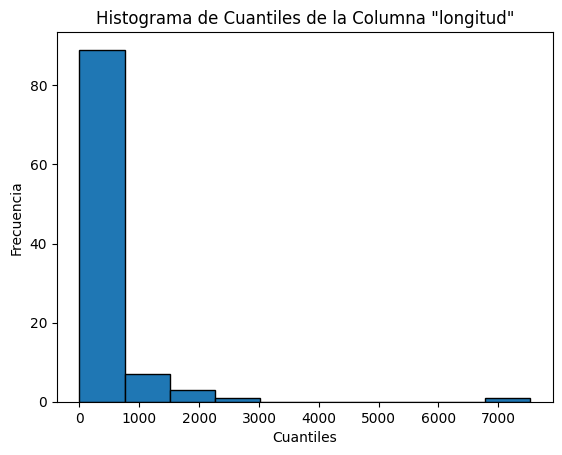

In [35]:
import matplotlib.pyplot as plt

quantiles = np.percentile(df['longitud'], np.arange(0, 101, 1))

plt.hist(quantiles, bins=10, edgecolor='black')
plt.title('Histograma de Cuantiles de la Columna "longitud"')
plt.xlabel('Cuantiles')
plt.ylabel('Frecuencia')
plt.show()


In [37]:
df.describe() # Como vemos hay muchisima variación en las reseñas respecto a la longitud, por lo tanto a la hora de hacer el modelo podría determinar que
# la longitud es un factor determinante para saber si lo ha hecho una IA, nosotros no queremos eso.

,longitud
count,2137.000000
mean,351.076275
std,504.814793
min,1.000000
25%,81.000000
50%,182.000000
75%,392.000000
max,7535.000000


In [38]:
df['longitud'].quantile(0.95)

1375.5999999999985

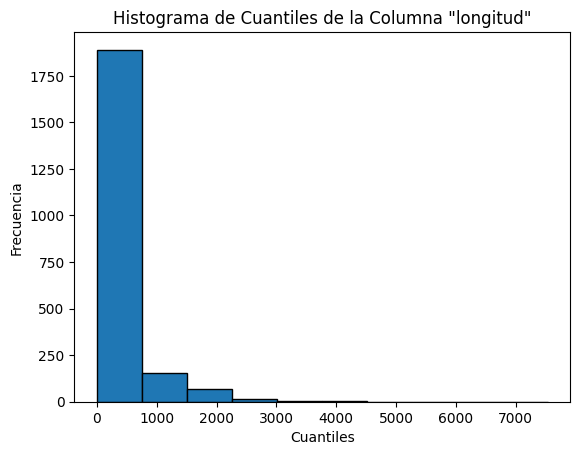

In [39]:
plt.hist(df['longitud'], bins=10, edgecolor='black')
plt.title('Histograma de Cuantiles de la Columna "longitud"')
plt.xlabel('Cuantiles')
plt.ylabel('Frecuencia')
plt.show()

In [40]:
len(df[df['longitud']>=3000])

9

In [41]:
len(df[df['longitud']<1375]) # Como a partir de aqui solo existe un 5 % restante y aumenta muchisimo el número de caracteres

2030

In [42]:
len(df)

2137

In [43]:
df_antiguo = df.copy() # Por si necesitamos ver algo de las reseñas muy largas
df = df[df['longitud'] < 1375]

In [44]:
len(df)

2030

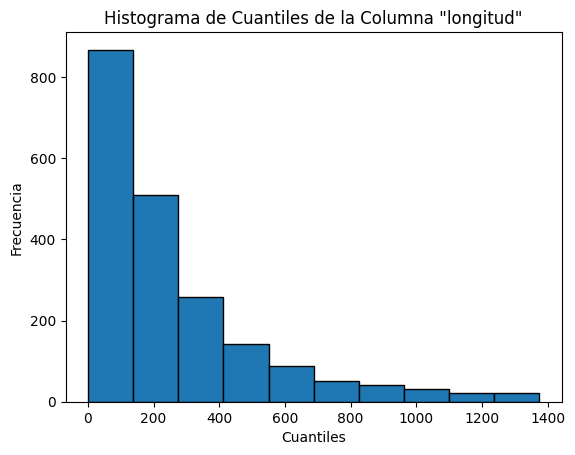

In [45]:
# Ahora podemos ver algo un poco mas lógico, a pesar que sigue habiendo unas reviews mas largas que otras

plt.hist(df['longitud'], bins=10, edgecolor='black')
plt.title('Histograma de Cuantiles de la Columna "longitud"')
plt.xlabel('Cuantiles')
plt.ylabel('Frecuencia')
plt.show()

In [46]:
df.describe() # Creo que quitar los demasiado cortos tmb podría ser muy útil

,longitud
count,2030.000000
mean,260.399015
std,265.697133
min,1.000000
25%,78.250000
50%,168.000000
75%,342.500000
max,1374.000000


In [47]:
df['longitud'].quantile(0.10)

38.0

In [48]:
df[df['longitud']<38]

,reseñas_humanas,nombre_producto,categoria_producto,longitud,idioma_original,idioma
38,Y sobre todo la calidad es propia.,"Apple iPhone 12 Pro, 128GB, Azul Pacif...",Amazon Renewed,30,fr,es
54,"Rápida entrega, super PC.",HP Elite 8300 - Ordenador de sobremesa...,Amazon Renewed,26,de,es
83,Calidad/precio,"Apple iPhone 11, 128GB, Rojo (Reacondi...",Amazon Renewed,14,es,es
106,"Funciona bien, todo perfecto, gracias.",HP EliteDesk 800 G1 - Ordenador de sob...,Amazon Renewed,33,en,es
118,Muy buen precio.,"Apple iPhone SE 2a Gen, 64GB, Negro - ...",Amazon Renewed,16,nl,es
...,...,...,...,...,...,...
2130,"""Bonita y elegante""",GuKKK Guirnaldas Luces Led Solares Ext...,Iluminación,17,da,es
2132,Recomiendo.,GuKKK Guirnaldas Luces Led Solares Ext...,Iluminación,13,en,es
2145,Muy contento.,"FUPT Tira LED TV, 5M Luces LED Habitac...",Iluminación,12,en,es
2151,Calidad precio inmejorable,"Realky Focos LED Exterior 2 Pcs, 20W I...",Iluminación,26,es,es


In [49]:
# Como son frases tan cortos va a ser imposible para el modelo poder distinguir nada.
df = df[df['longitud'] > 38]

In [50]:
df.describe() # Parece que ya ha tomado algo de forma

,longitud
count,1824.000000
mean,287.248904
std,267.307666
min,39.000000
25%,98.750000
50%,193.000000
75%,376.000000
max,1374.000000


In [51]:
# Añadimos alguna columna adicional antes de hacer la llamada a la API
df['IA'] = 0 # Hecho por humanos

In [52]:
df['longitud'].quantile(0.33)

128.0

In [53]:
df['longitud'].quantile(0.66)

286.18000000000006

In [54]:
def tamaño(x: int):
    if x < 128: return 'pequeña'
    if x > 286: return 'grande'
    if x >= 128 and x <= 286: return 'mediana'

In [55]:
df['tipo'] = df['longitud'].apply(lambda x:tamaño(x))

In [56]:
df.head()

,reseñas_humanas,nombre_producto,categoria_producto,longitud,idioma_original,idioma,IA,tipo
0,Necesitaba un nuevo movil y me decidí por este...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Amazon Renewed,297,es,es,0,grande
2,Está en perfectas condiciones la batería al 10...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Amazon Renewed,99,es,es,0,pequeña
3,Me llegó ayer el iPhone en perfectas condicion...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Amazon Renewed,436,es,es,0,grande
5,Compré un iPhone 12 a este vendedor y hace un...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Amazon Renewed,657,es,es,0,grande
6,Soy usuario de IPhone desde el principio. Teng...,"Apple iPhone 12, 128GB, Negro - (Reaco...",Amazon Renewed,596,es,es,0,grande


In [ ]:
df.to_csv('data/df_reseñas_humanas.csv', index=False)